HIPOTESIS EDA:

EN ESTE EDA SE QUIERE DEMOSTRAR QUE LAS POLITICAS DE IZQUIERDAS Y GLOBALISTAS, QUE SE REFLEJAN EN INDICADORES QUE SON CONSECUENCIA DE LA EMISION DESENFRENADA DE DEUDA, Y EL AUMENTO FISCAL TIENEN UN EFECTO NEGATIVO EN LOS VALORES ÉTICOS, SALUD TANTO FÍSICA Y MENTAL,
ADEMAS DE REPERCUTIR EN EL PRESTIGIO DADO POR LA CIUDADANIA ACTIVA AL LOBBY POLÍTICO Y ORGANISMOS QUE REPRESENTAN AL SISTEMA ,(Cuerpo policial, organismos internacionales, Eurodiputados, etc.)
EN ESTE CASO EL ESTUDIO SOLO SE CENTRARA EN LA EUROZONA. Y MAS DETALLADAMENTE EN SUBGRUPOS DE PAISES QUE TIENEN PARECIDOS EN LAS CARACTERISTICAS ECONOMICAS, CULTURALES Y CON CIERTA CERCANIA GEOGRAFICA.


EN RESUMEN SE DEMOSTRARA LA RELACION POSITIVA ENTRE LA INFLACION, EL BAJO SUELDO BRUTO MENSUAL MEDIO DEL PAIS Y CONDUCTAS NEGATIVAS PARA EL SISTEMA DE LA CIUDADANIA.

PLANTEAMIENTO:
Para ello haremos una división de nuestro dataset basandonos en la inflación, sueldo bruto mensual medio y pib per capita, para crear subgrupos que tengan similitudes socioeconomicas, compararemos los datos respecto a la Eurozona en general. Haremos un trabajo de etiquetación ademas de proponer varias variables de diferente campo semantico como targets.

Preparacion de datos:
Vamos a preparar los dataframes, descargandolos de la base de datos sql "database9k.db"

In [1]:
#1) Creacion de Subgrupos de paises:
import pandas as pd
from sqlalchemy import create_engine, text
import os
import sqlite3
#1.1 Nos conectamos a la base de datos.
database_path = os.path.abspath("C:/GitHubRepos/ProyectoFinal/data/processed/Dataset9k.db")
print(f"Database path: {database_path}")
conn = create_engine(f'sqlite:///{database_path}')
# Execute the SQL query, ya hemos visto en el visualizador de sql que los datos que deberian ser numericos hay algunas columnas que son formato texto, 
# hacemos un query para transformarlos just antes de almacenarlos en un dataframe

#DF inflacion
query = """
SELECT País, REPLACE(Inflación, ',', '.') AS Inflación_Float
FROM EuroInfl
"""
#Creamos un diccionario para almacenar la conversion
dtype_dict = {'Inflación_Float': float}
# Load the DataFrame with the dtype dictionary
df_inf = pd.read_sql_query(query, conn, dtype=dtype_dict)
df_inf.drop_duplicates(subset='País', keep='first', inplace=True)

#DF PPC
query = f"""
SELECT País, ROUND(PPC) AS PPC_INTEGER
FROM EuroPPC
"""
df_PPC = pd.read_sql_query(query, conn)
df_PPC.drop_duplicates(subset='País', keep='first', inplace=True)
print(df_PPC)

#DF SBMM
query = """
SELECT País, REPLACE(SBMM, ',', '.') AS SBMM_Float
FROM EuroSBMM
"""
dtype_dict = {'SBMM': float}
df_SBMM = pd.read_sql_query(query, conn)
df_SBMM.drop_duplicates(subset='País', keep='first', inplace=True)
df_SBMM['País'] = df_SBMM['País'].str.strip().str.lower()
conn.dispose()
print(df_SBMM)


Database path: C:\GitHubRepos\ProyectoFinal\data\processed\Dataset9k.db
                  País  PPC_INTEGER
0        Unión Europea         41.0
1             Bulgaria         16.0
2              Rumania         18.0
3              Croacia         22.0
4              Polonia         22.0
5              Hungría         22.0
6              Letonia         23.0
7               Grecia         23.0
8   República Eslovaca         24.0
9             Portugal         27.0
10            Lituania         28.0
11             Estonia         30.0
12     República Checa         32.0
13           Eslovenia         33.0
14              España         34.0
15              Chipre         37.0
16              Italia         39.0
17               Malta         40.0
18             Francia         45.0
19           Finlandia         53.0
20            Alemania         54.0
21             Bélgica         55.0
22              Suecia         56.0
23             Austria         56.0
24        Países Bajos      

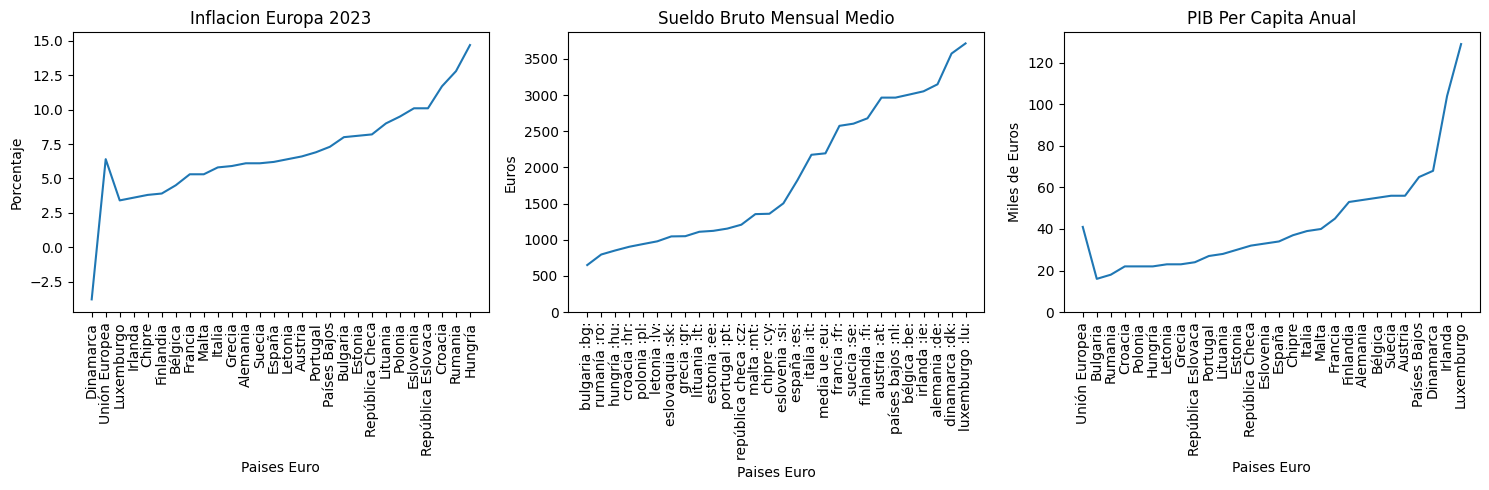

In [2]:
#1.5 Representacion Graficos Economicos.
import pandas as pd
import matplotlib.pyplot as plt

# ... (tu código existente)

# Crear una figura con 3 subplots en una fila
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Graficar cada DataFrame en un subplot diferente
axes[0].plot(df_inf['País'], df_inf['Inflación_Float'])
axes[0].set_title('Inflacion Europa 2023')
axes[0].set_xlabel('Paises Euro')
axes[0].set_ylabel('Porcentaje')
axes[0].tick_params(axis='x', rotation=90)  # Rotar las etiquetas del eje X 90 grados


df_SBMM['SBMM_Float'] = pd.to_numeric(df_SBMM['SBMM_Float'].str.replace(',', '.'), errors='coerce')
df_SBMM = df_SBMM.dropna(subset=['SBMM_Float'])
df_SBMM = df_SBMM.sort_values(by='SBMM_Float')
axes[1].plot(df_SBMM['País'], df_SBMM['SBMM_Float'])
axes[1].set_title('Sueldo Bruto Mensual Medio')
axes[1].set_xlabel('Paises Euro')
axes[1].set_ylabel('Euros')
axes[1].set_ylim(ymin=0)  # Asegurar que el eje Y comience en 0
axes[1].tick_params(axis='x', rotation=90)  # Rotar las etiquetas del eje X 90 grados

axes[2].plot(df_PPC['País'], df_PPC['PPC_INTEGER'])
axes[2].set_title('PIB Per Capita Anual')
axes[2].set_xlabel('Paises Euro')
axes[2].set_ylabel('Miles de Euros')
axes[2].set_ylim(ymin=0)  # Asegurar que el eje Y comience en 0
axes[2].tick_params(axis='x', rotation=90)  # Rotar las etiquetas del eje X 90 grados

# ... (repetir para los otros subplots)

# Ajustar el espaciado entre subplots
plt.tight_layout()

# Mostrar la figura
plt.show()

In [3]:
print(df_SBMM['SBMM_Float'].dtype)

int64
